# Mehmet Emin Aydın
## GAIH Final Project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [5]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


Index column seems to be unnecessary. Also, we need to drop x, y and z colums and create new feature which will be called volume for the sake of feature extraction.

In [6]:
data.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
seaborn.pairplot(data)

NameError: name 'seaborn' is not defined

In [9]:
#Creating a new feature
data["volume"] = data["x"]*data["y"]*data["z"]
new_data = data.drop(columns = ['x','z','y'],axis=1)

In [10]:
new_data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
new_data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
new_data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [13]:
new_data["price"].value_counts()

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

In [14]:
cleanup_nums = {"cut":{"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5},
               "color" : {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7},
                "clarity" : {"I1": 1,"SI2": 2,"SI1": 3,"VS2": 4, "VS1": 5,"VVS2": 6,"VVS1": 7,"IF": 8},
                "price" : {"Very Low": 1,"Low": 2, "Medium": 3,"High": 4,"Very High": 5}
               }
my_new_data = new_data.replace(cleanup_nums)
my_new_data.head()

,index,carat,cut,color,clarity,depth,table,price,volume
0,1,0.23,5,6,2,61.5,55.0,1,38.202030
1,2,0.21,4,6,3,59.8,61.0,1,34.505856
2,3,0.23,2,6,5,56.9,65.0,1,38.076885
3,4,0.29,4,2,4,62.4,58.0,1,46.724580
4,5,0.31,2,1,2,63.3,58.0,1,51.917250


In [15]:
seaborn.distplot(my_new_data)

NameError: name 'seaborn' is not defined

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
for col in ["carat","cut","color","clarity","depth","table","volume"]:
        my_new_data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(my_new_data[col])),columns=[col])

In [17]:
new_df = my_new_data.drop(columns = ["index"])
new_dataframe = new_df
seaborn.distplot(new_dataframe)

NameError: name 'seaborn' is not defined

In [18]:
#Splitting data
from sklearn.model_selection import train_test_split
X = new_dataframe.drop(['price'],axis=1)
y = new_dataframe.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Imbalanced Data

In [19]:
y_train.value_counts()

1    24179
2     7912
3     2906
4     1629
5     1132
Name: price, dtype: int64

In [20]:
y.value_counts()

1    34663
2    11271
3     4109
4     2308
5     1589
Name: price, dtype: int64

In [21]:
# I'll use Smote method.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)

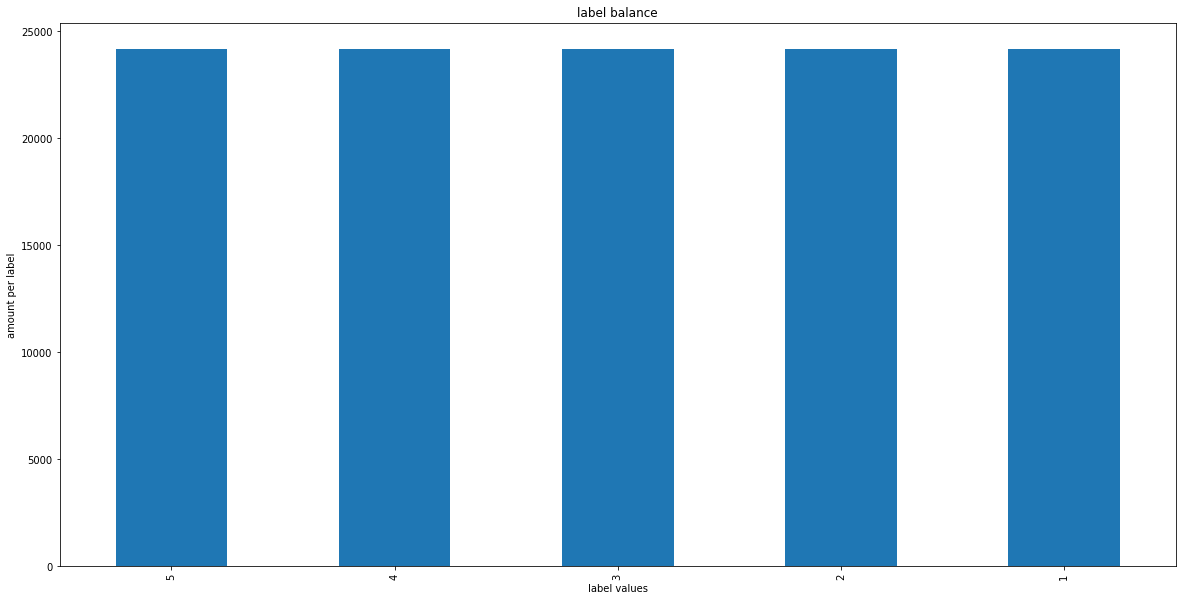

In [22]:
y_train_res.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_dict = {
    'max_depth':range(2,20),
}

my_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf = GridSearchCV(my_clf,param_dict,cv=3, n_jobs = -1).fit(X_train_res,y_train_res)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'max_depth': 19}
Mean of the cv scores is 0.945804
Train Score 0.990227
Test Score 0.924484
Seconds used for refitting the best model on the train dataset: 0.531784


-> When we choose 19 as max_depth, it seems to be overfitted. We need to prun it.

In [24]:
param_dict = {
    'max_depth':[12,13,14],
}

my_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf = GridSearchCV(my_clf,param_dict,cv=3, n_jobs = -1).fit(X_train_res,y_train_res)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))

Tuned: {'max_depth': 14}
Mean of the cv scores is 0.929294
Train Score 0.967980
Test Score 0.925349


If we keep decreasing max_depth, we can reliaze that when it is under 14, test score and train score both go down. 
If we increase and reach above 14, test score goes down although train score goes up. That is 14 is the most suitable max_depth

In [25]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8121514439836932
Recall = 0.8403823182574202
Accuracy = 0.9253491533802991
F1 Score = 0.8254501659822076


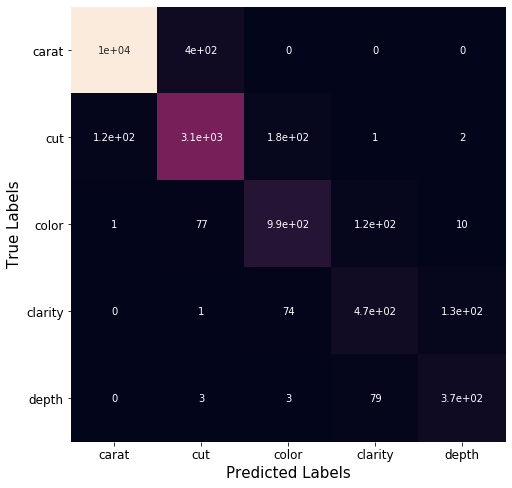

In [26]:
import seaborn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =seaborn.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(X.columns, fontsize = 12)
ax.yaxis.set_ticklabels(X.columns, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# XGBoost 

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
dmatrix_train = xgb.DMatrix(data=X_train_res, label=y_train_res)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [28]:
param_dict = {
    'max_depth':range(3,5),
    'min_child_weight':range(1,3),
    'learning_rate': [0.001,0.01],
    'n_estimators': [10,190],
    'num_class' : [2,3]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train_res,y_train_res)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))


Tuned: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 190, 'num_class': 2}
Mean of the cv scores is 0.826635
Train Score 0.898538
Test Score 0.895748
Seconds used for refitting the best model on the train dataset: 16.742051


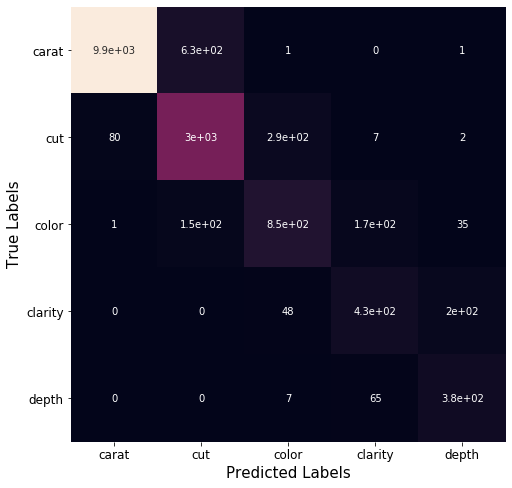

In [29]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = seaborn.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(X.columns, fontsize = 12)
ax.yaxis.set_ticklabels(X.columns, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [30]:
print("Precision = {}".format(precision_score(y_test, xgb_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, xgb_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, xgb_pred)))
print("F1 Score = {}".format(f1_score(y_test, xgb_pred,average='macro')))

Precision = 0.7501796858954319
Recall = 0.8014404048737281
Accuracy = 0.8957483623779509
F1 Score = 0.771555546842774


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train_res,y_train_res,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8264444914707907
Test accuracy: 0.889568656531949


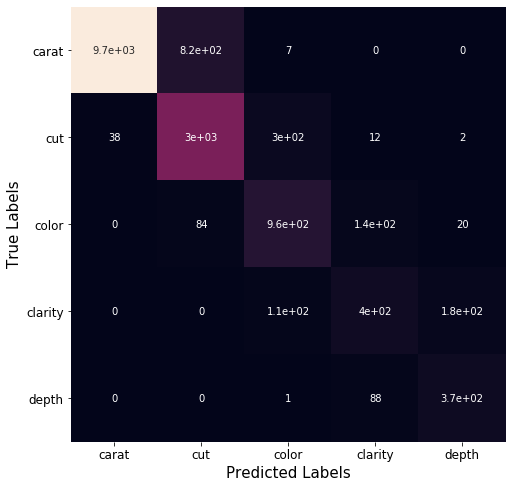

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(X.columns, fontsize = 12)
ax.yaxis.set_ticklabels(X.columns, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [33]:
final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='macro'))
print("Recall:",recall_score(y_test,y_pred,average='macro'))
print("F1 Score:",f1_score(y_test,y_pred,average='macro'))

Accuracy: 0.889568656531949
Precision: 0.7479719076135734
Recall: 0.8010699375355523
F1 Score: 0.7709124541053024


# Comments 

We had imbalanced data problem, and we solved it by using smote method. Then, we have well balanced data. Accuracy is useful when the target class is well balanced. Therefore, we need to consider accuracy score. 

    1) Decision Tree Accuracy Score = 0.9253491533802991
    2) XGBoost Accuracy Score = 0.8957483623779509
    3) Logistic Regression Accuracy Score = 0.889568656531949

To conclude, we may choose to use Decision Tree as our classification method.